In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f001f450550>,
      dtype=object)

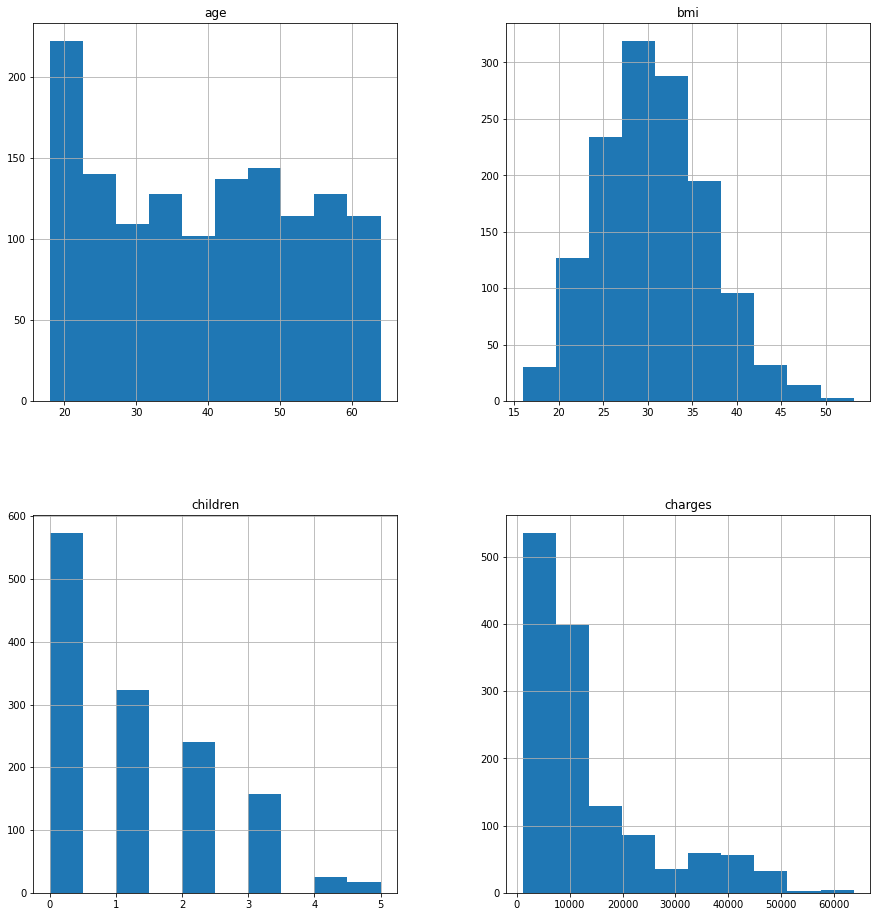

In [4]:
df.hist(figsize=(15,16))

In [38]:
df_moct = pd.concat([pd.DataFrame([df[['bmi','charges']].mean(),
                                   df[['bmi','charges']].median(),
                                   ]),
                     df[['bmi','charges']].mode()], 
                    ignore_index=True)
df_moct

,bmi,charges
0,30.663397,13270.422265
1,30.400000,9382.033000
2,32.300000,1639.563100


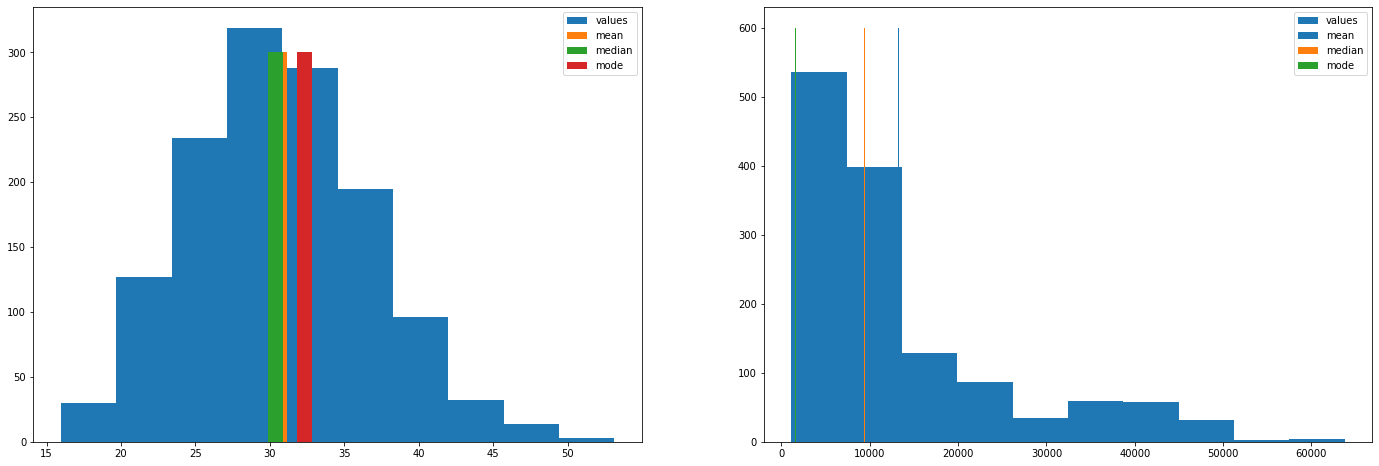

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
ax[0].hist(df['bmi'])
ax[1].hist(df['charges'])
for item in df_moct['bmi']:
  ax[0].hist(item, height=300, bins=5)
for item in df_moct['charges']:
  ax[1].bar(item, height=600, width=100)

ax[0].legend(['values','mean', 'median','mode'])
ax[1].legend(['values','mean', 'median','mode'])
plt.show()

In [7]:
df_sm = pd.DataFrame([df[['bmi','charges']].std(), 
                      df[['bmi','charges']].max() - df[['bmi','charges']].min(),
                      df[['bmi','charges']].quantile(.75) - df[['bmi','charges']].quantile(.25)
                      ])
df_sm

,bmi,charges
0,6.098187,12110.011237
1,37.170000,62648.554110
2,8.397500,11899.625365


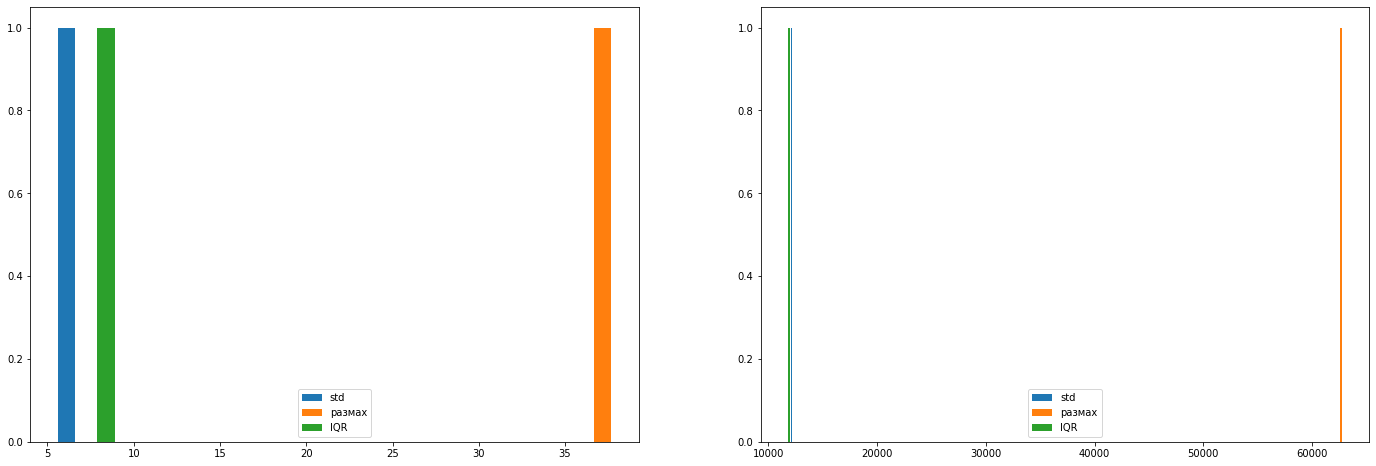

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
for item in df_sm['bmi']:
  ax[0].hist(item, bins=1)
for item in df_sm['charges']:
  ax[1].bar(item, 1, width=150)

ax[0].legend(['std', 'размах','IQR'])
ax[1].legend(['std', 'размах','IQR'])
ax[1]
plt.show()

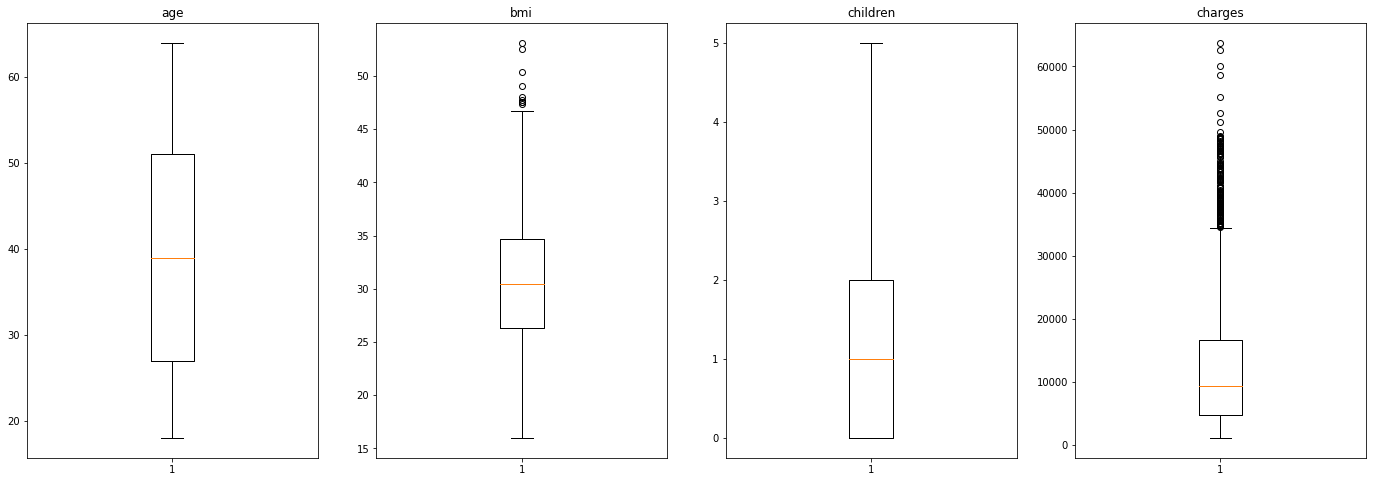

In [9]:
# 5
fig, ax = plt.subplots(1, 4, figsize=(24,8))
for i, item in enumerate(['age', 'bmi', 'children', 'charges']):
  ax[i].boxplot(df[item])
  ax[i].set_title(item)
plt.show()

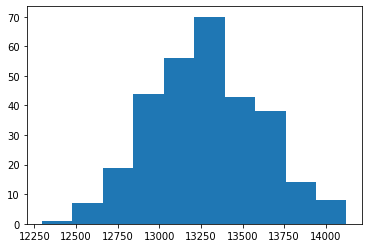

In [43]:
# 6
means = [np.mean(df['charges'].sample(frac=.5)) for _i in range(300)]
plt.hist(means, bins=10)
plt.show()

Выполняется ✅



In [11]:
print(f' std: {np.std(means)},\n mean: {np.mean(means)}')

 std: 338.95037955813,
 mean: 13270.486365089915


In [12]:
# 7
def mean_confidence_interval(data, confidence=0.95):
    x, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return [x-h, x+h]

In [13]:
means_charges = [np.mean(df['charges'].sample(frac=np.random.random())) for _i in range(300)]
means_bmi = [np.mean(df['bmi'].sample(frac=np.random.random())) for _i in range(300)]
print(' charges:')
print(f'95% доверительный интервал charges: {mean_confidence_interval(means_charges)}')
print(f'99% доверительный интервал charges: {mean_confidence_interval(means_charges, 0.99)}')
print('\n bmi:')
print(f'95% доверительный интервал bmi: {mean_confidence_interval(means_bmi)}')
print(f'99% доверительный интервал bmi: {mean_confidence_interval(means_bmi, 0.99)}')

 charges:
95% доверительный интервал charges: [13162.880497099617, 13309.735011694203]
99% доверительный интервал charges: [13139.581351854458, 13333.034156939362]

 bmi:
95% доверительный интервал bmi: [30.619855062284284, 30.722579423766557]
99% доверительный интервал bmi: [30.603557369121773, 30.738877116929068]


# 8

In [14]:
from scipy.stats import norm
import statistics 
import statsmodels.api as sm
from scipy import stats
import scipy.stats as sps

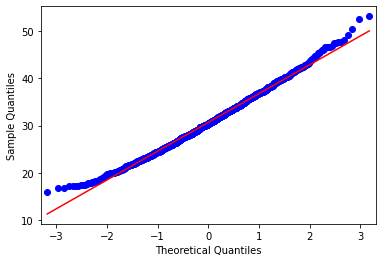

In [15]:
sm.qqplot(df['bmi'], line='s')
plt.show()

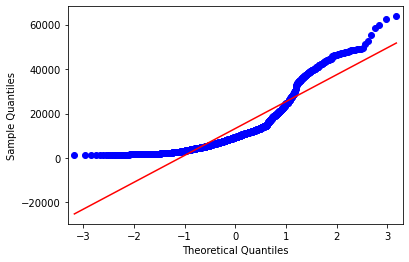

In [16]:
fig = sm.qqplot(df['charges'], line='s')
plt.show()

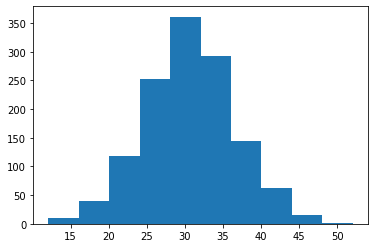

In [17]:
norm_bmi = np.random.normal(df['bmi'].mean(), df['bmi'].std(), 1300)
plt.hist(norm_bmi)
plt.show()

In [18]:
stats.kstest(df['bmi'], norm_bmi)

KstestResult(statistic=0.037494538346556285, pvalue=0.30147016215278166)

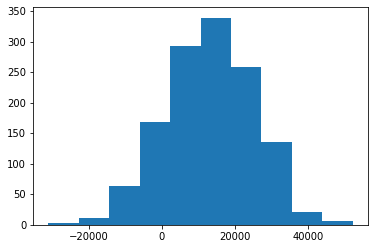

In [19]:
norm_charges = np.random.normal(df['charges'].mean(), df['charges'].std(), 1300)
plt.hist(norm_charges)
plt.show()

In [20]:
stats.kstest(df['charges'], norm_charges)

KstestResult(statistic=0.18718293664482005, pvalue=0.0)